# Loading the necessary libraries

In [1]:
import pandas as pd
import tensorflow as tf
import keras
from keras_preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras.models import Sequential
from keras.applications import InceptionV3
from keras.utils import to_categorical
from keras.layers import Dense, Flatten,BatchNormalization, Dropout, Lambda, Conv2D, MaxPool2D
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping  # Import EarlyStopping
from keras.metrics import Precision, Recall  # Import Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score



%matplotlib inline

# Loading the data

In [2]:
data = pd.read_pickle(r'C:\Users\yarin\Downloads\data1.pickle')

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

def resize(img_batch, method='nearest'):
    # Assuming img_batch is of shape (number_of_images, 32, 32, 3)
    number_of_images = img_batch.shape[0]
    new_array = np.zeros((number_of_images, 64, 64, 3))
    
    for i in range(number_of_images):
        # Resizing each image in the batch to (64, 64) using the specified method
        # 'nearest' method can make the resized images appear sharper
        new_array[i] = tf.image.resize(img_batch[i], (64, 64), method=method).numpy()
    
    return new_array

NumberofClass = 43

x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
x_val = data['x_validation']
y_val = data['y_validation']

x_train = x_train.swapaxes(1,2)
x_train = x_train.swapaxes(2,3)
x_test = x_test.swapaxes(1,2)
x_test = x_test.swapaxes(2,3)
x_val = x_val.swapaxes(1,2)
x_val = x_val.swapaxes(2,3)

y_train = to_categorical(y_train, num_classes = NumberofClass)
y_val = to_categorical(y_val, num_classes = NumberofClass)
y_test = to_categorical(y_test, num_classes = NumberofClass)

x_train = resize(x_train)
x_test = resize(x_test)
x_val = resize(x_val)



### Train Set

In [4]:
print(x_train.shape)

(86989, 64, 64, 3)


### Validation Set:

In [5]:
print(x_val.shape)

(4410, 64, 64, 3)


### Test Set

In [6]:
print(x_test.shape)

(12630, 64, 64, 3)


# Plotting some information on the data:

## Train Set:

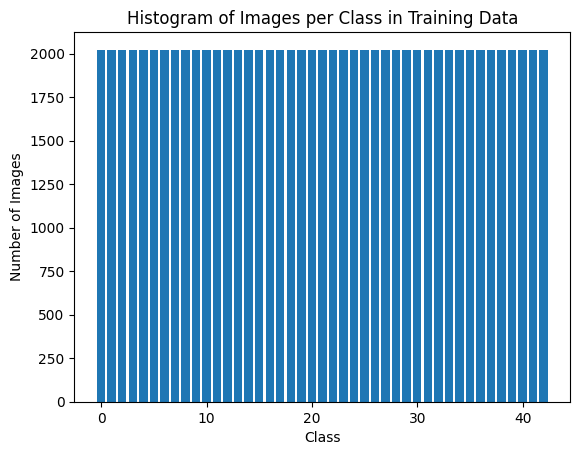

In [7]:
# Calculate histogram of labels
train_histogram = np.histogram(np.argmax(y_train, axis=1), bins=range(NumberofClass+1))
class_labels = np.arange(NumberofClass)

# Plot histogram
plt.bar(class_labels, train_histogram[0])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Class in Training Data')
plt.show()


We can see that the train set contains about 86000 images 2000 for each class (43 classes)

## Validation data:

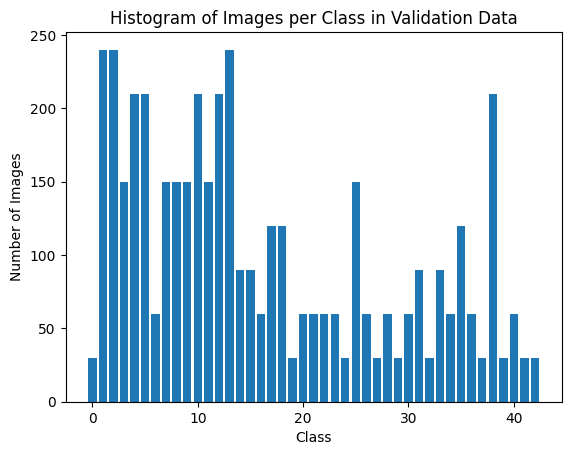

In [8]:
# Calculate histogram of labels
test_histogram = np.histogram(np.argmax(y_val, axis=1), bins=range(NumberofClass+1))
class_labels = np.arange(NumberofClass)

# Plot histogram
plt.bar(class_labels, test_histogram[0])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Class in Validation Data')
plt.show()

## Test set:

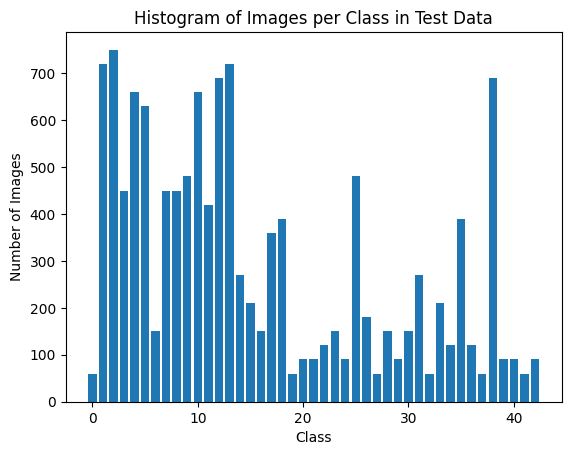

In [9]:
# Calculate histogram of labels
test_histogram = np.histogram(np.argmax(y_test, axis=1), bins=range(NumberofClass+1))
class_labels = np.arange(NumberofClass)

# Plot histogram
plt.bar(class_labels, test_histogram[0])
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Histogram of Images per Class in Test Data')
plt.show()

# Plotting Random instances of the data:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


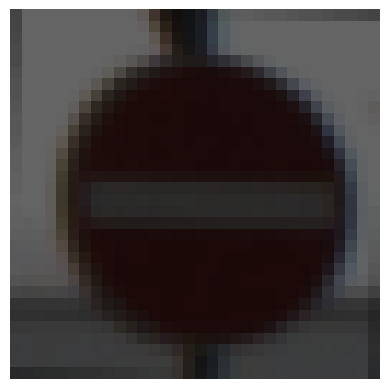

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


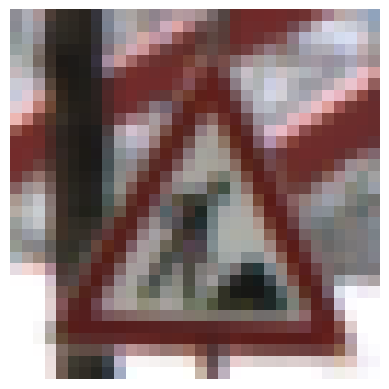

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


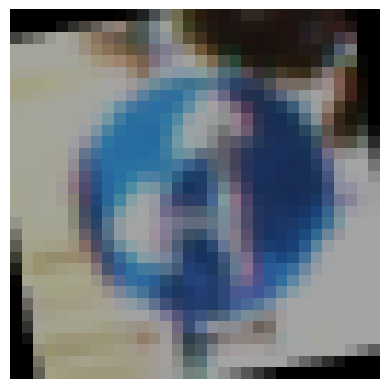

In [10]:
lst = [12, 13665, 2151]
for i in lst:
    print(y_train[i])
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.show()


### We resized images of 32x32 to 64x64

In [11]:
x_train[0].shape

(64, 64, 3)

In [12]:
x_train[0]

array([[[0.05098039, 0.04705882, 0.04313726],
        [0.05098039, 0.04705882, 0.04313726],
        [0.23529412, 0.21960784, 0.2       ],
        ...,
        [0.05490196, 0.05098039, 0.05098039],
        [0.03921569, 0.03921569, 0.03529412],
        [0.03921569, 0.03921569, 0.03529412]],

       [[0.05098039, 0.04705882, 0.04313726],
        [0.05098039, 0.04705882, 0.04313726],
        [0.23529412, 0.21960784, 0.2       ],
        ...,
        [0.05490196, 0.05098039, 0.05098039],
        [0.03921569, 0.03921569, 0.03529412],
        [0.03921569, 0.03921569, 0.03529412]],

       [[0.05882353, 0.05098039, 0.04705882],
        [0.05882353, 0.05098039, 0.04705882],
        [0.21960784, 0.19607843, 0.17647059],
        ...,
        [0.16470589, 0.15294118, 0.14901961],
        [0.13333334, 0.12941177, 0.11764706],
        [0.13333334, 0.12941177, 0.11764706]],

       ...,

       [[0.14509805, 0.14117648, 0.10588235],
        [0.14509805, 0.14117648, 0.10588235],
        [0.15294118, 0

# Fitting the Logistic Regression Model:

In [13]:
# Model definition
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Flatten the input images to 1D vectors
    Dense(NumberofClass, activation='softmax')  # Logistic regression/softmax layer
])

# Compile the model with precision and recall in the metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)
        
# Training the model with early stopping
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/20
2719/2719 [==============================] - 15s 5ms/step - loss: 1.6524 - accuracy: 0.6546 - precision: 0.8071 - recall: 0.4849 - val_loss: 1.9441 - val_accuracy: 0.6057 - val_precision: 0.6743 - val_recall: 0.5193
Epoch 2/20
2719/2719 [==============================] - 13s 5ms/step - loss: 1.0926 - accuracy: 0.7855 - precision: 0.8570 - recall: 0.6856 - val_loss: 2.0615 - val_accuracy: 0.6780 - val_precision: 0.7377 - val_recall: 0.6143
Epoch 3/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.9385 - accuracy: 0.8190 - precision: 0.8762 - recall: 0.7454 - val_loss: 1.8002 - val_accuracy: 0.7397 - val_precision: 0.7883 - val_recall: 0.7050
Epoch 4/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.8433 - accuracy: 0.8385 - precision: 0.8869 - recall: 0.7791 - val_loss: 1.5334 - val_accuracy: 0.7664 - val_precision: 0.8140 - val_recall: 0.7186
Epoch 5/20
2719/2719 [==============================] - 12s 5ms/step - loss: 0.7885 - accura

In [14]:
def plot_loss(history):
    # Extract training and validation loss from the history object
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Get the number of epochs
    epochs = range(1, len(train_loss) + 1)

    # Plotting the training and validation loss with improved aesthetics
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, 'b--.', label='Training Loss', linewidth=2)
    plt.plot(epochs, val_loss, 'r--.', label='Validation Loss', linewidth=2)

    # Adding smooth grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adding labels and title with larger font size
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.title('Training and Validation Loss', fontsize=16)

    # Adding legend with larger font size
    plt.legend(fontsize=12)

    # Adding a subtle background color
    plt.gca().set_facecolor('#f7f7f7')

    # Show the plot
    plt.show()

In [15]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
    # Extract training and validation accuracy from the history object
    train_accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    # Get the number of epochs
    epochs = range(1, len(train_accuracy) + 1)

    # Plotting the training and validation accuracy with improved aesthetics
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_accuracy, 'b-', label='Training Accuracy', linewidth=2)
    plt.plot(epochs, val_accuracy, 'r-', label='Validation Accuracy', linewidth=2)

    # Adding smooth grid lines
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adding labels and title with larger font size
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.title('Training and Validation Accuracy', fontsize=16)

    # Adding legend with larger font size
    plt.legend(fontsize=12)

    # Adding a subtle background color
    plt.gca().set_facecolor('#f7f7f7')

    # Show the plot
    plt.show()

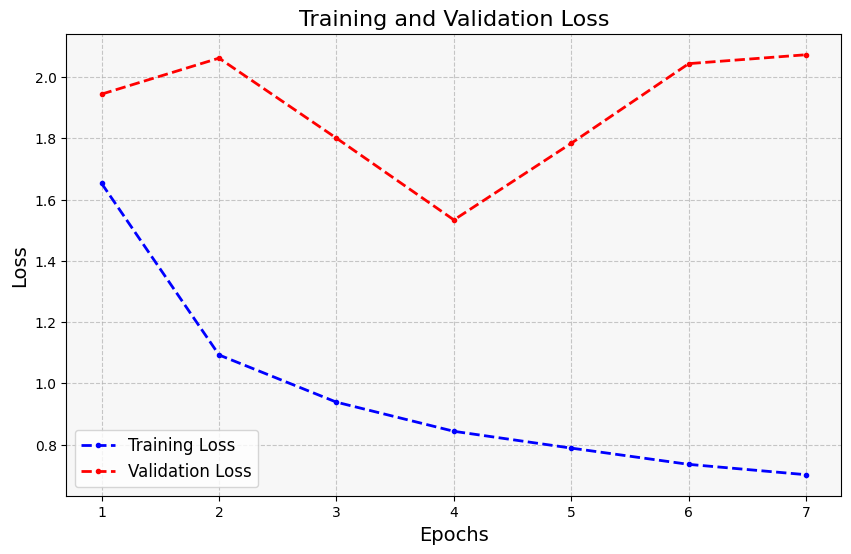

In [16]:
plot_loss(history)

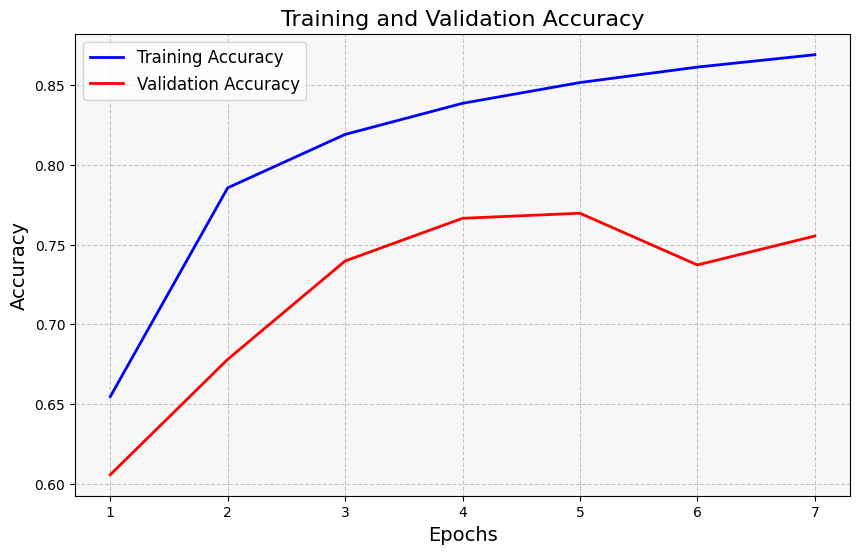

In [17]:
plot_accuracy(history)

## Predicting Values:

In [18]:
# Use model.predict to get the raw model predictions
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

395/395 [==============================] - 1s 2ms/step
Test accuracy: 0.7749802058590657, Test precision: 0.7803934244280317, Test recall: 0.7094034961499571


### Plotting The Confusion Matrix:

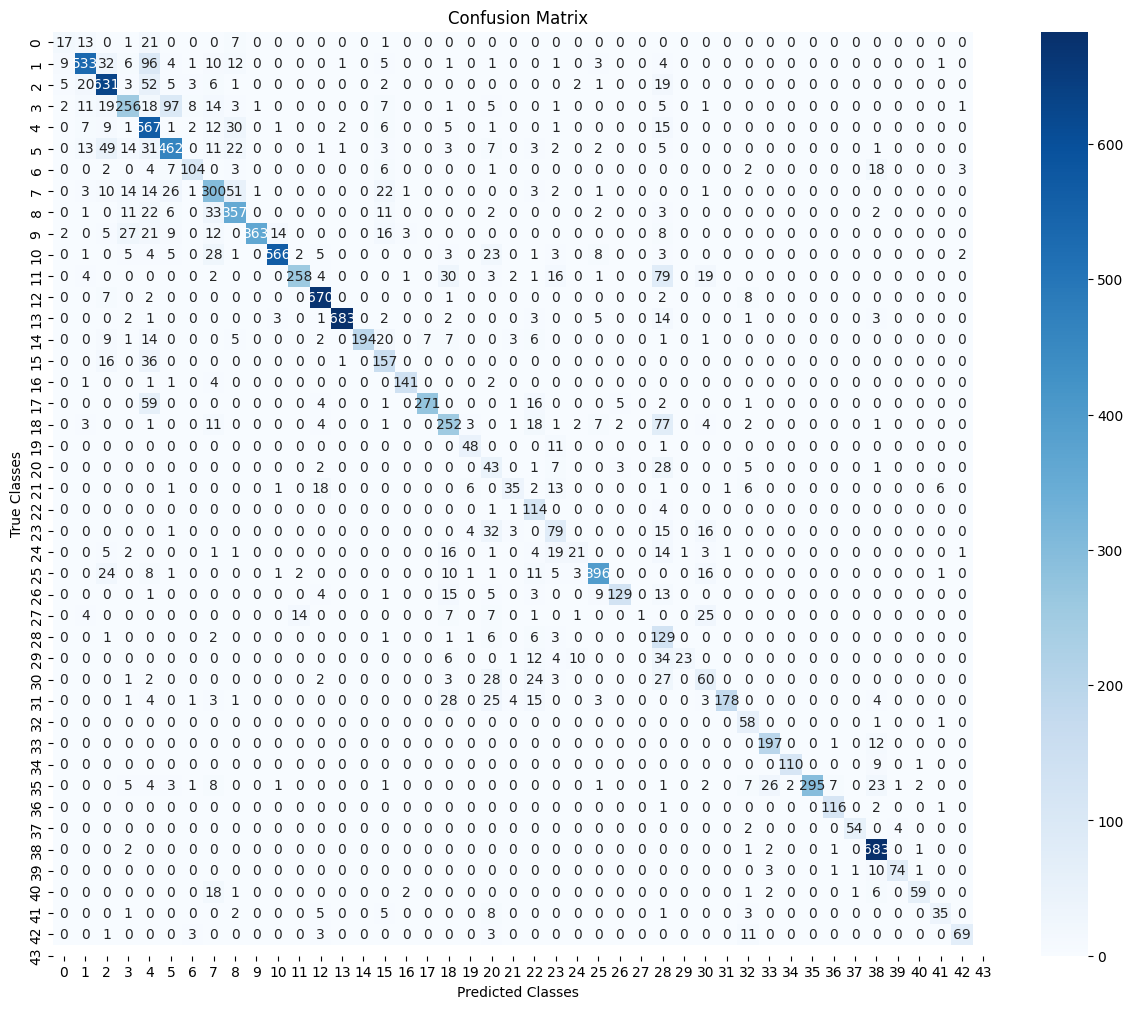

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(0,44)), yticklabels=list(range(0,44)))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

# Fitting the Artifical Neural Network:

In [20]:
# Model definition with more layers
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Flatten the input images to 1D vectors
    Dense(128, activation='relu'),  # First hidden layer with ReLU activation
    Dense(128, activation='relu'),   # Second hidden layer with ReLU activation
    Dense(128, activation='relu'),   # Third hidden layer with ReLU activation
    Dense(128, activation='relu'),   # Fourth hidden layer with ReLU activation
    Dense(NumberofClass, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)

# Training the model with early stopping
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping])


Epoch 1/20
2719/2719 [==============================] - 14s 5ms/step - loss: 1.4600 - accuracy: 0.5789 - val_loss: 1.1802 - val_accuracy: 0.6769
Epoch 2/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.5668 - accuracy: 0.8329 - val_loss: 0.9599 - val_accuracy: 0.7474
Epoch 3/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.4056 - accuracy: 0.8793 - val_loss: 0.9361 - val_accuracy: 0.7864
Epoch 4/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.3244 - accuracy: 0.9031 - val_loss: 0.9727 - val_accuracy: 0.7692
Epoch 5/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.2783 - accuracy: 0.9148 - val_loss: 1.3140 - val_accuracy: 0.7608
Epoch 6/20
2719/2719 [==============================] - 13s 5ms/step - loss: 0.2591 - accuracy: 0.9225 - val_loss: 1.3277 - val_accuracy: 0.7973
Epoch 6: early stopping


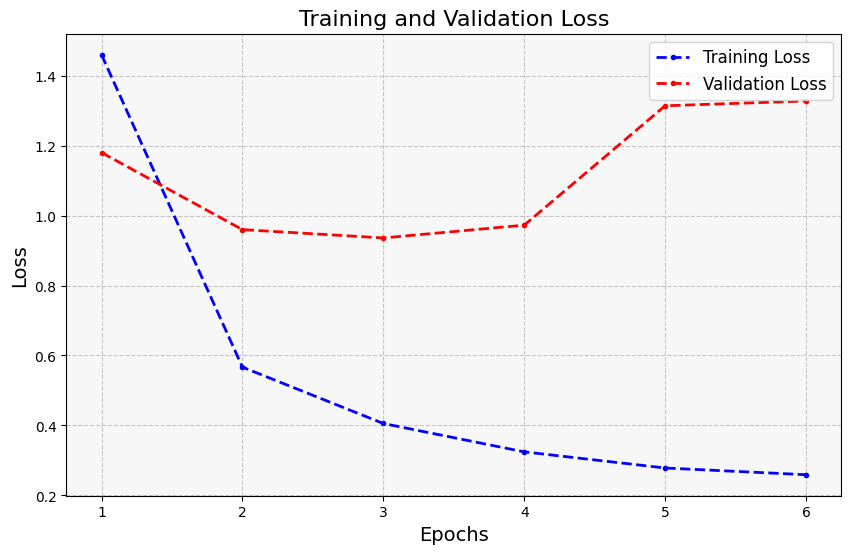

In [21]:
plot_loss(history)

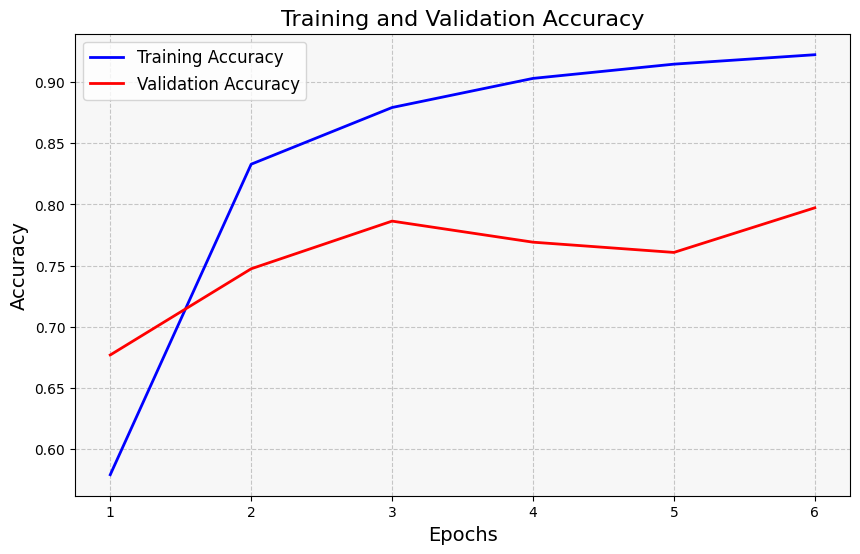

In [22]:
plot_accuracy(history)

## Predicting Values

In [23]:
# Use model.predict to get the raw model predictions
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

395/395 [==============================] - 1s 3ms/step
Test accuracy: 0.7726049089469517, Test precision: 0.7363493536255634, Test recall: 0.7303726409530251


### Confusion Matrix:

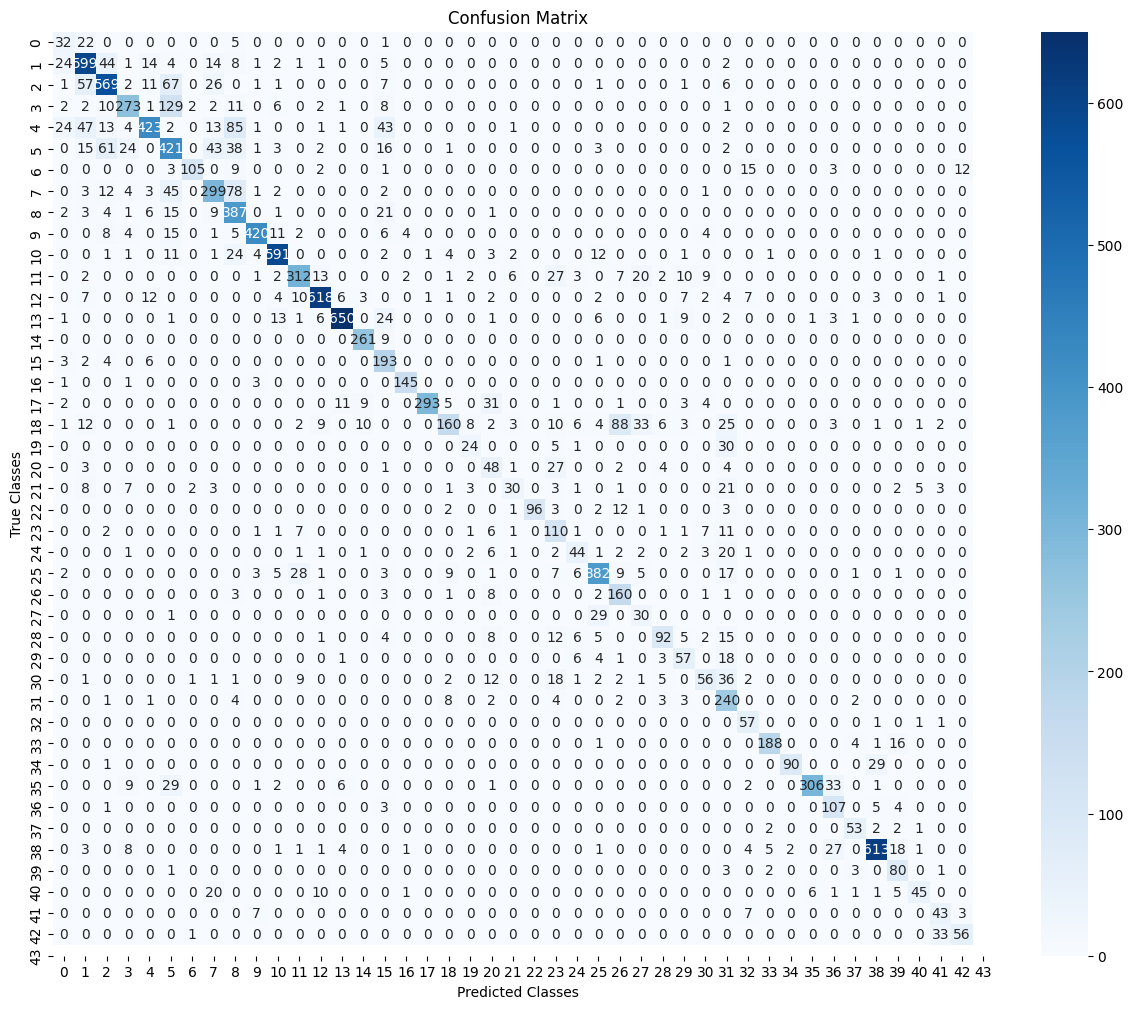

In [24]:
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(0,44)), yticklabels=list(range(0,44)))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

# Training a CNN

In [35]:
#CNN model
model = Sequential()


model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu", input_shape = (64,64,3)))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = "Same", activation = "relu" ))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(units = 256, activation = "relu"))

model.add(Dropout(0.5))

model.add(BatchNormalization())

model.add(Dense(units = NumberofClass, activation = "softmax"))

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)
hist = model.fit(x_train, y_train, batch_size = 32,
                    epochs = 20, validation_data = (x_val, y_val),callbacks=[early_stopping])


Epoch 1/20
2719/2719 [==============================] - 26s 9ms/step - loss: 1.1022 - accuracy: 0.6849 - val_loss: 0.2408 - val_accuracy: 0.9227
Epoch 2/20
2719/2719 [==============================] - 24s 9ms/step - loss: 0.1786 - accuracy: 0.9467 - val_loss: 0.1593 - val_accuracy: 0.9499
Epoch 3/20
2719/2719 [==============================] - 24s 9ms/step - loss: 0.1085 - accuracy: 0.9661 - val_loss: 0.1735 - val_accuracy: 0.9558
Epoch 4/20
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0869 - accuracy: 0.9731 - val_loss: 0.1417 - val_accuracy: 0.9601
Epoch 5/20
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0717 - accuracy: 0.9774 - val_loss: 0.2314 - val_accuracy: 0.9531
Epoch 6/20
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0677 - accuracy: 0.9792 - val_loss: 0.1700 - val_accuracy: 0.9642
Epoch 7/20
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0562 - accuracy: 0.9830 - val_loss: 0.1347 - val_ac

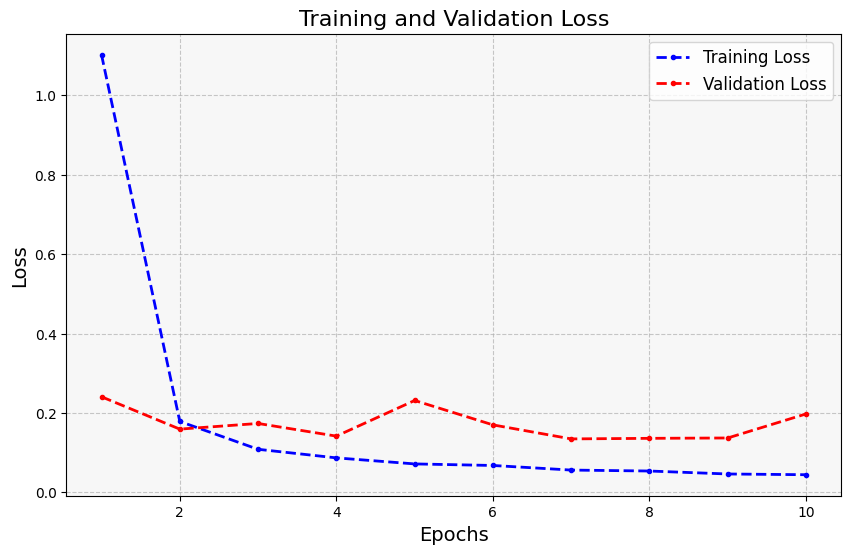

In [36]:
plot_loss(hist)

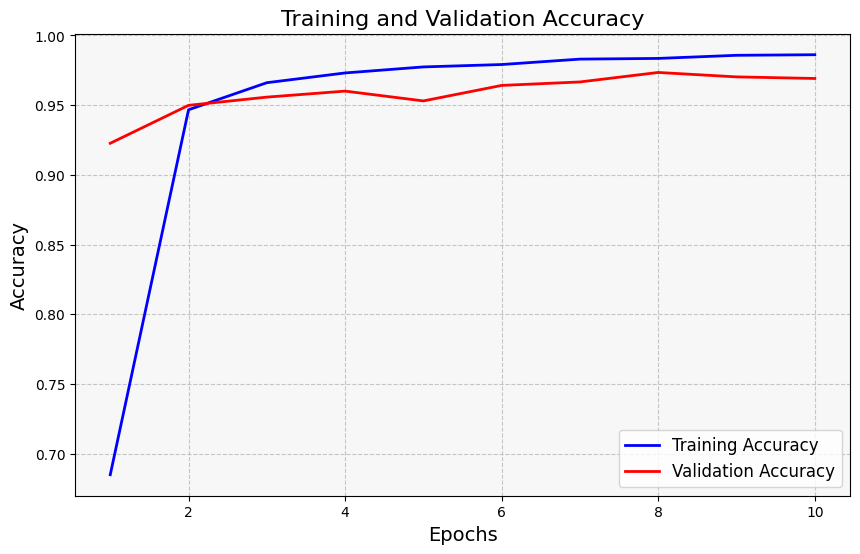

In [37]:
plot_accuracy(hist)

## Predicting Values

In [39]:
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

395/395 [==============================] - 1s 3ms/step
Test accuracy: 0.9580364212193191, Test precision: 0.9378744740211885, Test recall: 0.9371306091766151


### Confusion Matrix

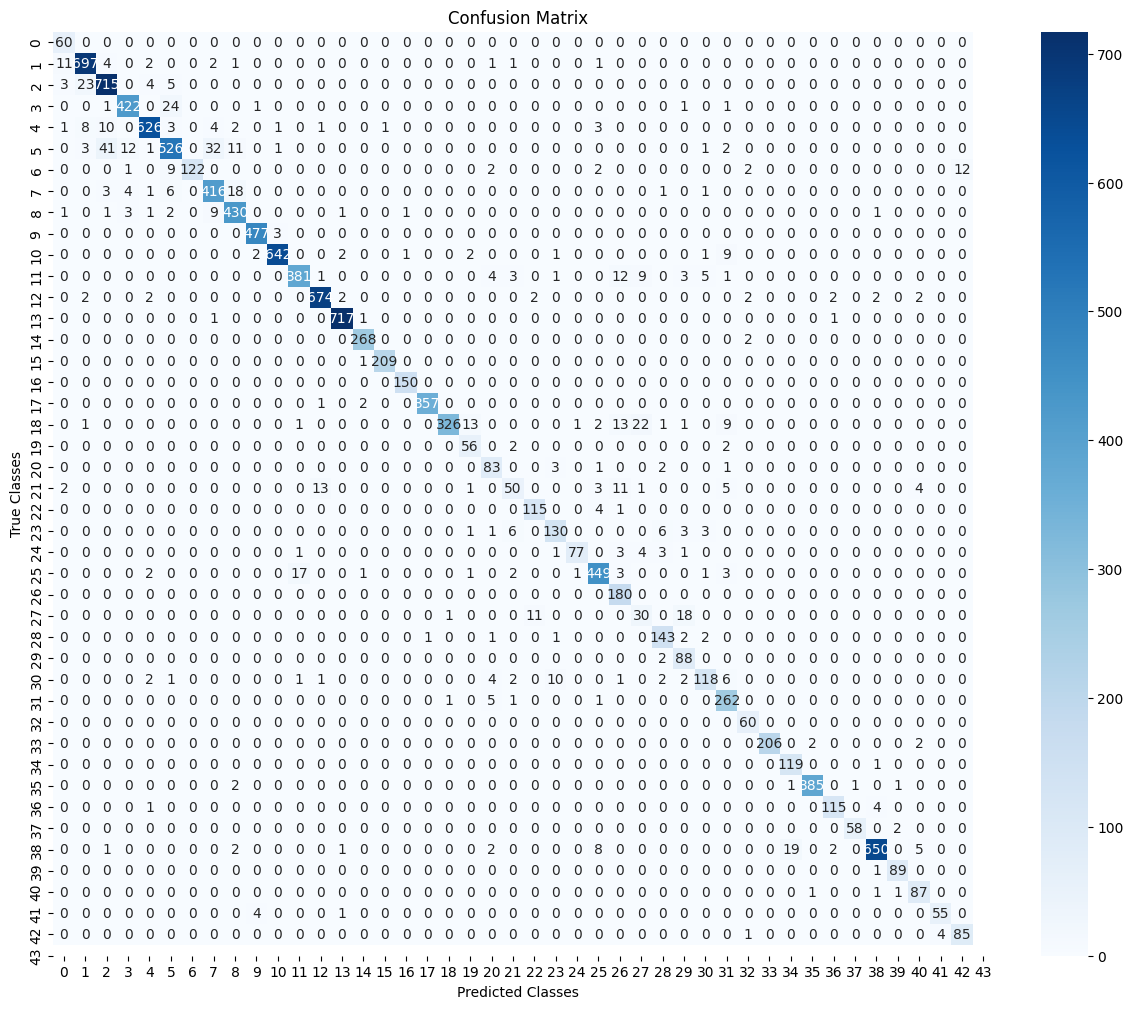

In [29]:

conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(0,44)), yticklabels=list(range(0,44)))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()

# Training a RNN:

In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, TimeDistributed, Flatten
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score


# RNN model
model = Sequential()

# Adjust input_shape=(time_steps, features) according to your data
model.add(TimeDistributed(Flatten(), input_shape=(64, 64, 3)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=NumberofClass, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=3, verbose=1, restore_best_weights=True)

hist = model.fit(x_train, y_train, batch_size=32, epochs=20, validation_data=(x_val, y_val), callbacks=[early_stopping])



Epoch 1/20
2719/2719 [==============================] - 24s 8ms/step - loss: 2.1984 - accuracy: 0.3254 - val_loss: 1.9410 - val_accuracy: 0.4027
Epoch 2/20
2719/2719 [==============================] - 22s 8ms/step - loss: 0.9856 - accuracy: 0.6867 - val_loss: 1.3666 - val_accuracy: 0.5993
Epoch 3/20
2719/2719 [==============================] - 22s 8ms/step - loss: 0.5465 - accuracy: 0.8326 - val_loss: 1.1140 - val_accuracy: 0.6828
Epoch 4/20
2719/2719 [==============================] - 22s 8ms/step - loss: 0.3804 - accuracy: 0.8857 - val_loss: 0.9724 - val_accuracy: 0.7460
Epoch 5/20
2719/2719 [==============================] - 22s 8ms/step - loss: 0.2892 - accuracy: 0.9139 - val_loss: 0.8304 - val_accuracy: 0.7961
Epoch 6/20
2719/2719 [==============================] - 21s 8ms/step - loss: 0.2345 - accuracy: 0.9298 - val_loss: 0.9387 - val_accuracy: 0.7918
Epoch 7/20
2719/2719 [==============================] - 22s 8ms/step - loss: 0.1990 - accuracy: 0.9406 - val_loss: 0.8541 - val_ac

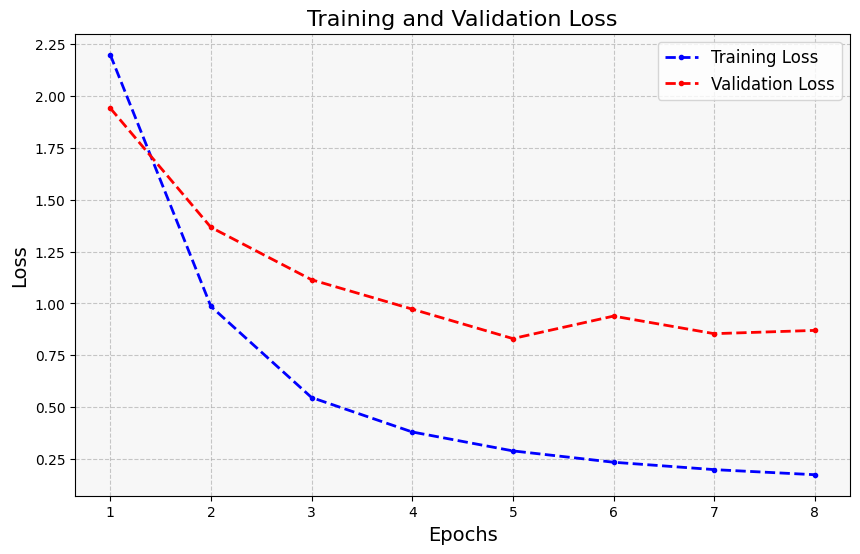

In [31]:
plot_loss(hist)

## Predicting Values:

In [33]:
predictions = model.predict(x_test)

# Convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes, average='macro')
recall = recall_score(true_classes, predicted_classes, average='macro')

# Print the results
print(f'Test accuracy: {accuracy}, Test precision: {precision}, Test recall: {recall}')

395/395 [==============================] - 2s 4ms/step
Test accuracy: 0.8017418844022169, Test precision: 0.7794450518890552, Test recall: 0.7363799676057006


### Confusion Matrix

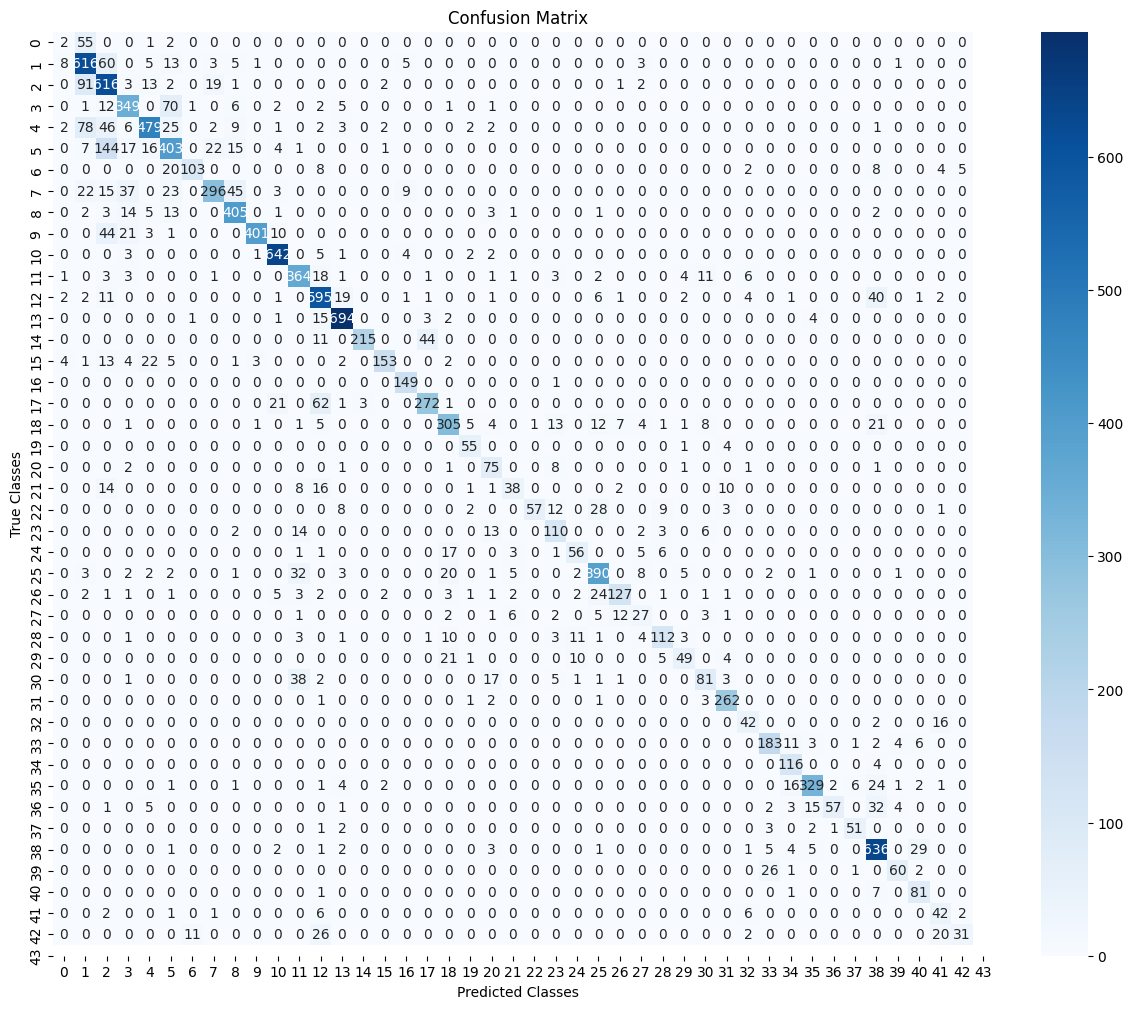

In [34]:

conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(15, 12))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(range(0,44)), yticklabels=list(range(0,44)))
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.title('Confusion Matrix')
plt.show()